## check ${\rm d}B(k)/{\rm d}M_\nu$ using the Quijote simulations


In [1]:
import os
import h5py
import numpy as np 
# --- emanu ---
from emanu import util as UT 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def quijote_Bk(tt, rsd=True): 
    ''' Read in bispectrum for the quijote simulation 
    '''
    fbk = os.path.join(UT.dat_dir(), 'bispectrum', 'quijote_%s%s.hdf5' % (tt, ['.real', ''][rsd]))
    bks = h5py.File(fbk, 'r')
    print fbk 
    _bks = {}
    for k in bks.keys(): 
        _bks[k] = bks[k].value
    return _bks

In [4]:
# first in redshift space
bk_fid = quijote_Bk('fiducial', rsd=True) # Mnu = 0.0 eV
bk_p = quijote_Bk('Mnu_p', rsd=True) # Mnu = 0.1 eV
bk_pp = quijote_Bk('Mnu_pp', rsd=True) # Mnu = 0.2 eV
bk_ppp = quijote_Bk('Mnu_ppp', rsd=True) # Mnu = 0.4 eV

/Users/ChangHoon/data/emanu/bispectrum/quijote_fiducial.hdf5
/Users/ChangHoon/data/emanu/bispectrum/quijote_Mnu_p.hdf5
/Users/ChangHoon/data/emanu/bispectrum/quijote_Mnu_pp.hdf5
/Users/ChangHoon/data/emanu/bispectrum/quijote_Mnu_ppp.hdf5


In [7]:
i_k, j_k, l_k = bk_fid['k1'], bk_fid['k2'], bk_fid['k3']
kf = 2. * np.pi / 1000. # k_fundamental
klim = ((i_k * kf <= 0.5) & (j_k * kf <= 0.5) & (l_k * kf <= 0.5))
ijl = UT.ijl_order(i_k[klim], j_k[klim], l_k[klim])

In [28]:
bkfid = np.average(bk_fid['b123'], axis=0)[klim][ijl]
bkp = np.average(bk_p['b123'], axis=0)[klim][ijl]
bkpp = np.average(bk_pp['b123'], axis=0)[klim][ijl]
bkppp = np.average(bk_ppp['b123'], axis=0)[klim][ijl]

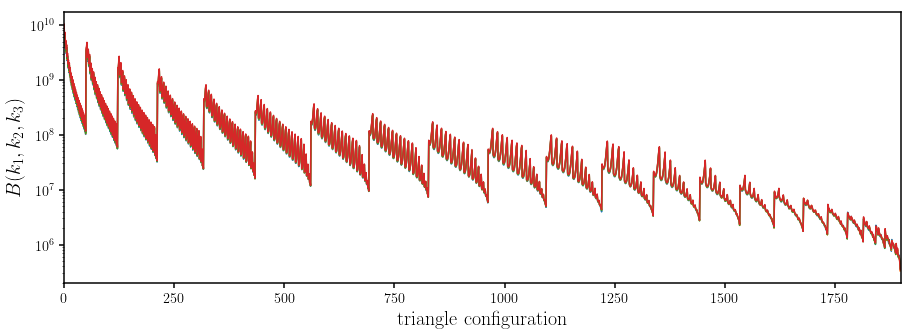

In [29]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for _bk in [bkfid, bkp, bkpp, bkppp]: 
    sub.plot(range(np.sum(klim)), _bk)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(klim))
sub.set_ylabel('$B(k_1, k_2, k_3)$', fontsize=20)
sub.set_yscale('log')

(50000000.0, 500000000.0)

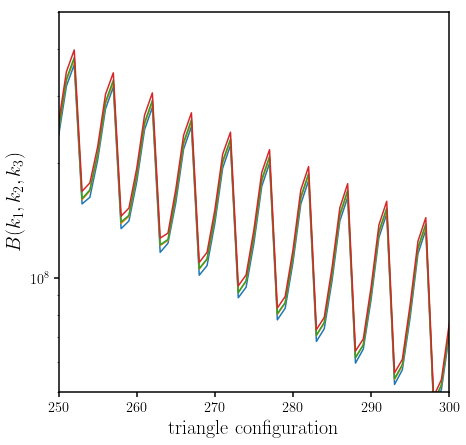

In [32]:
fig = plt.figure(figsize=(7,7))
sub = fig.add_subplot(111)
for _bk in [bkfid, bkp, bkpp, bkppp]: 
    sub.plot(range(np.sum(klim)), _bk)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(250, 300)
sub.set_ylabel('$B(k_1, k_2, k_3)$', fontsize=20)
sub.set_yscale('log')
sub.set_ylim(5e7, 5e8)

(0.9, 1.3)

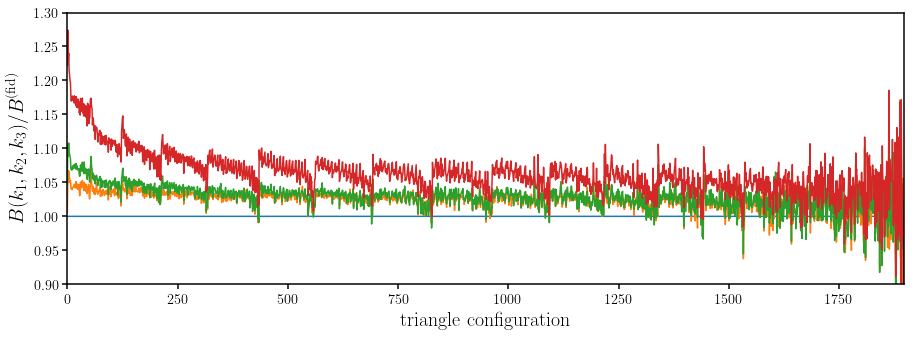

In [34]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for _bk in [bkfid, bkp, bkpp, bkppp]: 
    sub.plot(range(np.sum(klim)), _bk/bkfid)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(klim))
sub.set_ylabel(r'$B(k_1, k_2, k_3)/B^{(\rm{fid})}$', fontsize=20)
sub.set_ylim([0.9, 1.3])

In [36]:
# calculate the derivatives
dbk_p = (bkp - bkfid)/0.1
dbk_pp = (bkpp - bkfid)/0.2
dbk_ppp = (bkppp - bkfid)/0.4
dbk_fin = (-21. * bkfid + 32.*bkp - 12.*bkpp + bkppp)/1.2

(100000.0, 10000000000.0)

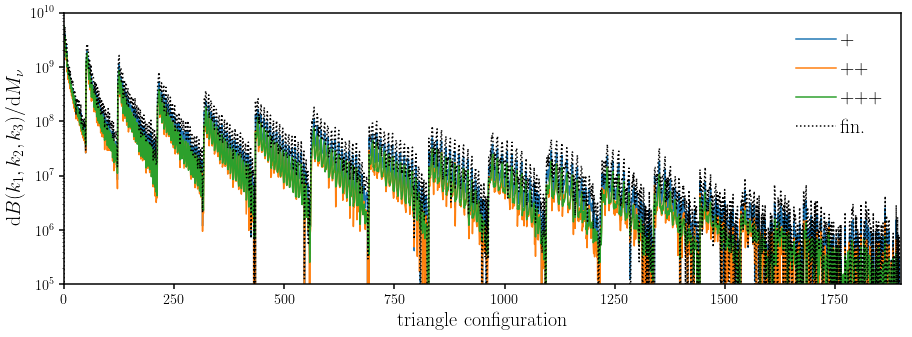

In [47]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(klim)), dbk_p, label='+')
sub.plot(range(np.sum(klim)), dbk_pp, label='++')
sub.plot(range(np.sum(klim)), dbk_ppp, label='+++')
sub.plot(range(np.sum(klim)), dbk_fin, c='k', ls=':', label='fin.')
sub.legend(loc='upper right', handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(klim))
sub.set_ylabel(r'${\rm d}B(k_1, k_2, k_3)/{\rm d}M_\nu$', fontsize=20)
sub.set_yscale('log')
sub.set_ylim(1e5, 1e10)

(10000000.0, 200000000.0)

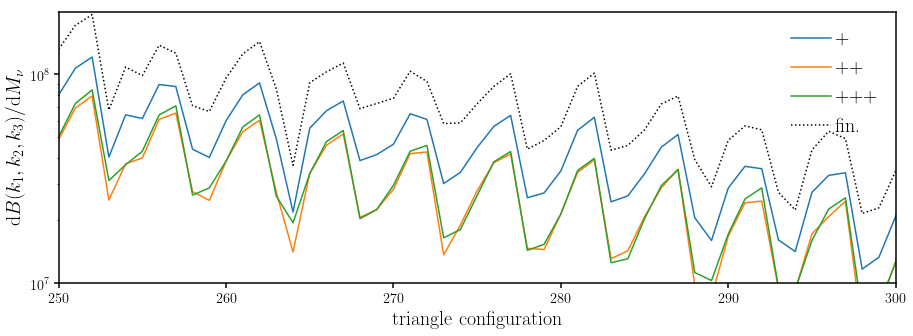

In [49]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(klim)), dbk_p, label='+')
sub.plot(range(np.sum(klim)), dbk_pp, label='++')
sub.plot(range(np.sum(klim)), dbk_ppp, label='+++')
sub.plot(range(np.sum(klim)), dbk_fin, c='k', ls=':', label='fin.')
sub.legend(loc='upper right', handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(250, 300)
sub.set_ylabel(r'${\rm d}B(k_1, k_2, k_3)/{\rm d}M_\nu$', fontsize=20)
sub.set_yscale('log')
sub.set_ylim(1e7, 2e8)